In [1]:
pip install scikit-fuzzy



[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install paho-mqtt

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


c:\Users\AMANDA\AppData\Local\Programs\Python\Python310\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


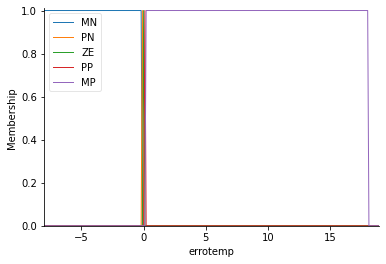

In [3]:
import numpy as np
import skfuzzy as fuzz
import paho.mqtt.client as mqtt
from skfuzzy import control as ctrl
import time

mqttBroker ="test.mosquitto.org"
client = mqtt.Client("c213Inatelsbm")
# client.connect(mqttBroker)

# errotemp - funções de pertinência e universo
errotemp = ctrl.Antecedent(np.arange(-8, 19, 0.1), 'errotemp')
errotemp['MN'] = fuzz.trapmf(errotemp.universe, [-8, -8, -0.2, -0.1])
errotemp['PN'] = fuzz.trimf(errotemp.universe, [-0.2, -0.1, 0])
errotemp['ZE'] = fuzz.trimf(errotemp.universe, [-0.1, 0, 0.1])
errotemp['PP'] = fuzz.trimf(errotemp.universe, [0, 0.1, 0.2])
errotemp['MP'] = fuzz.trapmf(errotemp.universe, [0.1, 0.2, 18, 18])
errotemp.view()

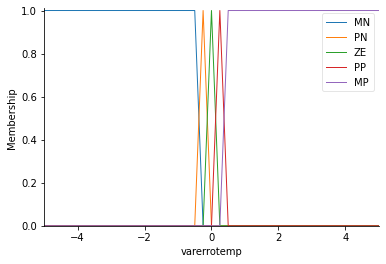

In [4]:
varerrotemp =ctrl.Antecedent(np.arange(-5, 5.01, 0.01), 'varerrotemp')
varerrotemp['MN'] = fuzz.trapmf(varerrotemp.universe, [-5, -5, -0.5,-0.25])
varerrotemp['PN'] = fuzz.trimf(varerrotemp.universe, [-0.5,-0.25,0])
varerrotemp['ZE'] = fuzz.trimf(varerrotemp.universe, [-0.25, 0, 0.25])
varerrotemp['PP'] = fuzz.trimf(varerrotemp.universe, [0, 0.25, 0.5])
varerrotemp['MP'] = fuzz.trapmf(varerrotemp.universe,[0.25, 0.5, 5,5])
varerrotemp.view()

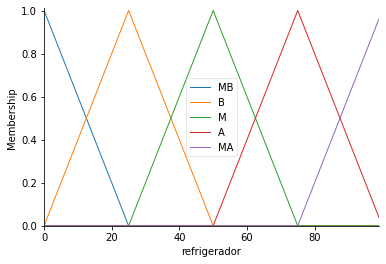

In [6]:
# refrigerador - funções de pertinência e universo
refrigerador =ctrl.Consequent(np.arange(0, 100, 1), 'refrigerador')
refrigerador['MB'] = fuzz.trimf(refrigerador.universe, [0,0,25])
refrigerador['B'] = fuzz.trimf(refrigerador.universe, [0,25,50])
refrigerador['M'] = fuzz.trimf(refrigerador.universe, [25, 50, 75])
refrigerador['A'] = fuzz.trimf(refrigerador.universe, [50, 75, 100])
refrigerador['MA'] = fuzz.trimf(refrigerador.universe, [75, 100, 100])
refrigerador.view()

In [7]:
regra1 = ctrl.Rule(errotemp['MN']& varerrotemp['MN'], refrigerador['MB'])
regra6 = ctrl.Rule(errotemp['MN']& varerrotemp['PN'], refrigerador['MB'])
regra11 = ctrl.Rule(errotemp['MN']& varerrotemp['ZE'], refrigerador['B'])
regra16 = ctrl.Rule(errotemp['MN']& varerrotemp['PP'], refrigerador['M'])
regra21 = ctrl.Rule(errotemp['MN']& varerrotemp['MP'], refrigerador['A'])
regra2 = ctrl.Rule(errotemp['PN']& varerrotemp['MN'], refrigerador['MB'])
regra7 = ctrl.Rule(errotemp['PN']& varerrotemp['PN'], refrigerador['MB'])
regra12 = ctrl.Rule(errotemp['PN']& varerrotemp['ZE'], refrigerador['B'])
regra17 = ctrl.Rule(errotemp['PN']& varerrotemp['PP'], refrigerador['M'])
regra22 = ctrl.Rule(errotemp['PN']& varerrotemp['MP'], refrigerador['A'])
regra3 = ctrl.Rule(errotemp['ZE']& varerrotemp['MN'], refrigerador['MB'])
regra8 = ctrl.Rule(errotemp['ZE']& varerrotemp['PN'], refrigerador['B'])
regra13 = ctrl.Rule(errotemp['ZE']& varerrotemp['ZE'], refrigerador['M'])
regra18 = ctrl.Rule(errotemp['ZE']& varerrotemp['PP'], refrigerador['A'])
regra23 = ctrl.Rule(errotemp['ZE']& varerrotemp['MP'], refrigerador['MA'])
regra4 = ctrl.Rule(errotemp['PP']& varerrotemp['MN'], refrigerador['B'])
regra9 = ctrl.Rule(errotemp['PP']& varerrotemp['PN'], refrigerador['M'])
regra14 = ctrl.Rule(errotemp['PP']& varerrotemp['ZE'], refrigerador['A'])
regra19 = ctrl.Rule(errotemp['PP']& varerrotemp['PP'], refrigerador['MA'])
regra24 = ctrl.Rule(errotemp['PP']& varerrotemp['MP'], refrigerador['MA'])
regra5 = ctrl.Rule(errotemp['MP']& varerrotemp['MN'], refrigerador['M'])
regra10 = ctrl.Rule(errotemp['MP']& varerrotemp['PN'], refrigerador['A'])
regra15 = ctrl.Rule(errotemp['MP']& varerrotemp['ZE'], refrigerador['MA'])
regra20 = ctrl.Rule(errotemp['MP']& varerrotemp['PP'], refrigerador['MA'])
regra25 = ctrl.Rule(errotemp['MP']& varerrotemp['MP'], refrigerador['MA'])


In [8]:
refrigerador_ctrl = ctrl.ControlSystem([regra1, regra2, regra3,regra4,regra5,regra6, regra7, regra8,regra9,regra10,regra11, regra12, regra13,regra14,regra15,regra16, regra17, regra18,regra19,regra20,regra21, regra22, regra23,regra24,regra25])
potencia = ctrl.ControlSystemSimulation(refrigerador_ctrl)

In [9]:
# parâmetros iniciais do sistema
menu_flag = True
setpoint = 0
tempatual = 0

while menu_flag:
    print('Qual setpoint deseja selecionar:')
    print('1 - setpoint -2')
    print('2 - setpoint -6')
    print('3 - setpoint -8')
    print('4 - sair')
    
    
    option = input('Selecione o setpoint:')
    
    
    match option:
        case "1":
            setpoint = -2
            menu_flag = False

        case "2":
            setpoint = -6
            menu_flag = False

        case "3":
            setpoint = -8
            menu_flag = False

        case "4":
            menu_flag = False
        case _:
            print("Escolha um valor válido.")

tempatual = float(input('Selecione a temperatura atual:'))
erroatual = 0

while True :
    erroanterior=erroatual
    erroatual=tempatual-setpoint
    varerroTemp=erroatual-erroanterior
    potencia.input['errotemp'] =erroatual
    potencia.input['varerrotemp'] =varerroTemp
    potencia.compute()

# simulação da temperatura
    i=0
    while (i < 10):
        tempatual=tempatual * 0.9952 - potencia.output['refrigerador'] * 0.0003963
        time.sleep(0.01)
        i += 1

    # publicação dos resultados via MQTT
    print(tempatual)
    client.publish("Resfriador/Temperatura", tempatual)
    client.publish("Resfriador/erro", erroatual)

Qual setpoint deseja selecionar:
1 - setpoint -2
2 - setpoint -6
3 - setpoint -8
4 - sair
